# COURSERA DATA SCIENCE CAPSTONE: SEATTLE TRAFFIC ACCIDENT DATA

## Business Context & Understanding

The purpose of this project is to predict the severity of traffic accidents using a traffic accident dataset. The end goal will be a solution that, given weather, road, and other conditions, can warn the end-user about the liklihood of getting into a car accident, and how severe that accident will be. Armed with this insight, the end user can take more safety precautions when driving or reroute travel plans altogether.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d207ef080f5c4b08b86ad30aea87e420 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fqeeLKlN62nmb4-RJ2Argjcjbt1vC0RJcls5NswaEDg6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d207ef080f5c4b08b86ad30aea87e420.get_object(Bucket='datasciencecapstone-donotdelete-pr-qzdsbxqo2ogzt6',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Understanding & Preparation

The data utilized for this project comes from Seattle traffic collisions and describes collisions (target variable) as either "property damage only collisions" or "injury collisions". Needless to say, it would be very insightful to predict whether a traffic accident will likely leed to physical injuries or not. That being said, the dataset features variables including the address type in which the collision occurred, road, light, and weather conditions, the number of people in the car at the time of the accident, the number of vehicles involved in the collision, the number of pedestrians involved in the accident, the type of junction involved at the scene of the collision, whether the driver was under the influence, and whether the collision involved hitting a parked car. Some of these variables are more relevant and significant as it pertains to predicting the severity of a collision, and how well the prediction informs drivers.

The following code involves processing and manipulation of the data, including removing insignificant attributes, addressing missing values, and transforming categorical data. Following, the condition of attributes, or columns, is assessed by observing trends, certain patterns, skewness, distributions, and correlations.

In [6]:
# Essential Methods:: Understand your data before you begin your analysis
df_new = df[['ADDRTYPE', 'ROADCOND', 'LIGHTCOND', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'HITPARKEDCAR']]
df_new.head()

,ADDRTYPE,ROADCOND,LIGHTCOND,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,HITPARKEDCAR
0,Intersection,Wet,Daylight,Injury Collision,Angles,2,0,2,At Intersection (intersection related),N,Overcast,N
1,Block,Wet,Dark - Street Lights On,Property Damage Only Collision,Sideswipe,2,0,2,Mid-Block (not related to intersection),0,Raining,N
2,Block,Dry,Daylight,Property Damage Only Collision,Parked Car,4,0,3,Mid-Block (not related to intersection),0,Overcast,N
3,Block,Dry,Daylight,Property Damage Only Collision,Other,3,0,3,Mid-Block (not related to intersection),N,Clear,N
4,Intersection,Wet,Daylight,Injury Collision,Angles,2,0,2,At Intersection (intersection related),0,Raining,N


In [7]:
missing_data = df_new.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

HITPARKEDCAR
False    194673
Name: HITPARKEDCAR, dtype: int64



In [8]:
df_new = df_new.dropna(axis=0)

In [9]:
for column in df_new.columns.values.tolist():
    print(column)
    print(df_new[column].value_counts())
    print("")

ADDRTYPE
Block           119362
Intersection     63298
Alley              235
Name: ADDRTYPE, dtype: int64

ROADCOND
Dry               122153
Wet                46710
Unknown            11519
Ice                 1177
Snow/Slush           978
Other                123
Standing Water       108
Sand/Mud/Dirt         67
Oil                   60
Name: ROADCOND, dtype: int64

LIGHTCOND
Daylight                    113837
Dark - Street Lights On      47547
Unknown                      10448
Dusk                          5771
Dawn                          2453
Dark - No Street Lights       1461
Dark - Street Lights Off      1157
Other                          210
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

SEVERITYDESC
Property Damage Only Collision    126270
Injury Collision                   56625
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
Parked Car    43119
Angles        34453
Rear Ended    33641
Other         22960
Sideswipe     18285
Left Turn     13637
Pedestria

In [10]:
df_new['UNDERINFL'] = df_new['UNDERINFL'].replace(to_replace=['N', 'Y'], value=[0,1])

In [11]:
df_new['HITPARKEDCAR'] = df_new['HITPARKEDCAR'].replace(to_replace=['N', 'Y'], value=[0,1])

In [12]:
df_new['SEVERITYDESC'] = df_new['SEVERITYDESC'].replace(to_replace=['Property Damage Only Collision', 'Injury Collision'], value=[0,1])

In [13]:
df_new.dtypes

ADDRTYPE         object
ROADCOND         object
LIGHTCOND        object
SEVERITYDESC      int64
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
VEHCOUNT          int64
JUNCTIONTYPE     object
UNDERINFL        object
WEATHER          object
HITPARKEDCAR      int64
dtype: object

In [14]:
df_new['UNDERINFL'] = df_new['UNDERINFL'].astype('int') 
df_new['HITPARKEDCAR'] = df_new['HITPARKEDCAR'].astype('int')
df_new['PERSONCOUNT'] = df_new['PERSONCOUNT'].astype('int')
df_new['PEDCOUNT'] = df_new['PEDCOUNT'].astype('int')
df_new['VEHCOUNT'] = df_new['VEHCOUNT'].astype('int')
df_new[['ROADCOND', 'LIGHTCOND', 'SEVERITYDESC', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER']] = df_new[['ROADCOND', 'LIGHTCOND', 'SEVERITYDESC', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER']].astype('category')

There are noteworthy empirical observations within our dataset that warrant acknowledgement, namely 1) nearly twice as many accidents occur on blocks rather than intersections, 2) most accidents occur during dry road conditions and there are three-times as many accidents during dry road conditions compared to wet road conditions, 3) most accidents occur during daylight hours, followed by dark light conditions with street lights on, 4) twice as many collisions involve no injury - only property damage (2x's more likely compared to collisions involving injury), 5) the top three types of collisions include (in descending order) parked cars, angles, and rear-ended, 6) most collisions involve 2 people in the car, 0 pedestrians involved, and 2 cars in the accident, 8) the main junction types in which collisions occured are mid-blocks (not related to intersection), at-intersection, and mid-block (intersection-related), 9) most people involved in an accident are not under the influence, 10) most accidents do not involve hitting a parked car, and lastly 11) weather conditions in which the majority of recodered accidents are clear, with a small subset of accidents occuring when its raining or overcast.

## Modeling

Setting data visualization aside, the next step is to prepare the dataset for applying a machine learning model to better understand what variables (conditions) significantly contribute to the severity of traffic accidents. In this project we will be deploying Decision Trees to identify what features significantly contribute to the severity of traffic accidents. 

In [15]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [16]:
df_new.head()

,ADDRTYPE,ROADCOND,LIGHTCOND,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,HITPARKEDCAR
0,Intersection,Wet,Daylight,1,Angles,2,0,2,At Intersection (intersection related),0,Overcast,0
1,Block,Wet,Dark - Street Lights On,0,Sideswipe,2,0,2,Mid-Block (not related to intersection),0,Raining,0
2,Block,Dry,Daylight,0,Parked Car,4,0,3,Mid-Block (not related to intersection),0,Overcast,0
3,Block,Dry,Daylight,0,Other,3,0,3,Mid-Block (not related to intersection),0,Clear,0
4,Intersection,Wet,Daylight,1,Angles,2,0,2,At Intersection (intersection related),0,Raining,0


In [17]:
X = df_new[['ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'WEATHER']].values
X[0:5]

array([['Wet', 'Daylight', 'Angles', 'Overcast'],
       ['Wet', 'Dark - Street Lights On', 'Sideswipe', 'Raining'],
       ['Dry', 'Daylight', 'Parked Car', 'Overcast'],
       ['Dry', 'Daylight', 'Other', 'Clear'],
       ['Wet', 'Daylight', 'Angles', 'Raining']], dtype=object)

In [18]:
le_road = preprocessing.LabelEncoder()
le_road.fit(['Dry', 'Wet', 'Unknown', 'Ice', 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'])
X[:,0] = le_road.transform(X[:,0])

Using the LabelEncoder() function, we are able to transform categorical variables into numerical variables that the Decision Tree Classifier can then use to train a model. Note that the following numbers correspond to the following road conditions:

    Dry = 0
    Wet = 1
    Unknown = 2
    Ice = 3
    Snow/Slush = 4
    Other = 5
    Standing Water = 6
    Sand/Mud/Dirt = 7
    Oil = 8

In [19]:
le_light = preprocessing.LabelEncoder()
le_light.fit(['Daylight', 'Dark - Street Lights On', 'Unknown', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Other', 'Dark - Unknown Lighting'])
X[:,1] = le_light.transform(X[:,1])

Similarly, the following numbers correspond to the different types of lighting conditions:

    Daylight = 0
    Dark - Street Lights On = 1
    Unknown = 2
    Dusk = 3
    Dawn = 4
    Dark - No Street Lights = 5
    Dark - Street Lights Off = 6
    Other = 7
    Dark - Unknown Lighting = 8

In [20]:
le_collision = preprocessing.LabelEncoder()
le_collision.fit(['Parked Car', 'Angles', 'Rear Ended', 'Other', 'Sideswipe', 'Left Turn', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On'])
X[:,2] = le_collision.transform(X[:,2])

Collision Types:

    Parked Car = 0
    Angles = 1
    Rear Ended = 2
    Other = 3
    Sideswipe = 4
    Left Turn = 5
    Pedestrian = 6
    Cycles = 7
    Right Turn = 8
    Head On = 9

In [21]:
le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Clear', 'Raining', 'Overcast', 'Unknown', 'Snowing', 'Other', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'])
X[:,3] = le_weather.transform(X[:,3])

Weather Conditions:

    Clear = 0
    Raining = 1
    Overcast = 2
    Unknown = 3
    Snowing = 4
    Other = 5
    Fog/Smog/Smoke = 6
    Sleet/Hail/Freezing Rain = 7
    Blowing Sand/Dirt = 8
    Severe Crosswind = 9
    Partly Cloudy = 10

In [22]:
X

array([[8, 5, 0, 4],
       [8, 2, 9, 6],
       [0, 5, 5, 4],
       ...,
       [0, 5, 3, 1],
       [0, 6, 1, 1],
       [8, 5, 7, 1]], dtype=object)

In [23]:
Y = df_new[['SEVERITYDESC']].values
Y

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [24]:
print("X shape:", X.shape)
print("y shape:", Y.shape)

X shape: (182895, 4)
y shape: (182895, 1)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [26]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
clf = tree.fit(X_train, y_train)

In [28]:
predtree = tree.predict(X_test)

In [29]:
print(predtree[0:5])
print(y_test[0:5])

[0 0 0 0 1]
[[1]
 [1]
 [1]
 [0]
 [1]]


In [30]:
# Test Set Accuracy
print("Test Set Accuracy:", metrics.accuracy_score(y_test, predtree))

Test Set Accuracy: 0.7431313048470434


In [36]:
 !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

In [37]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

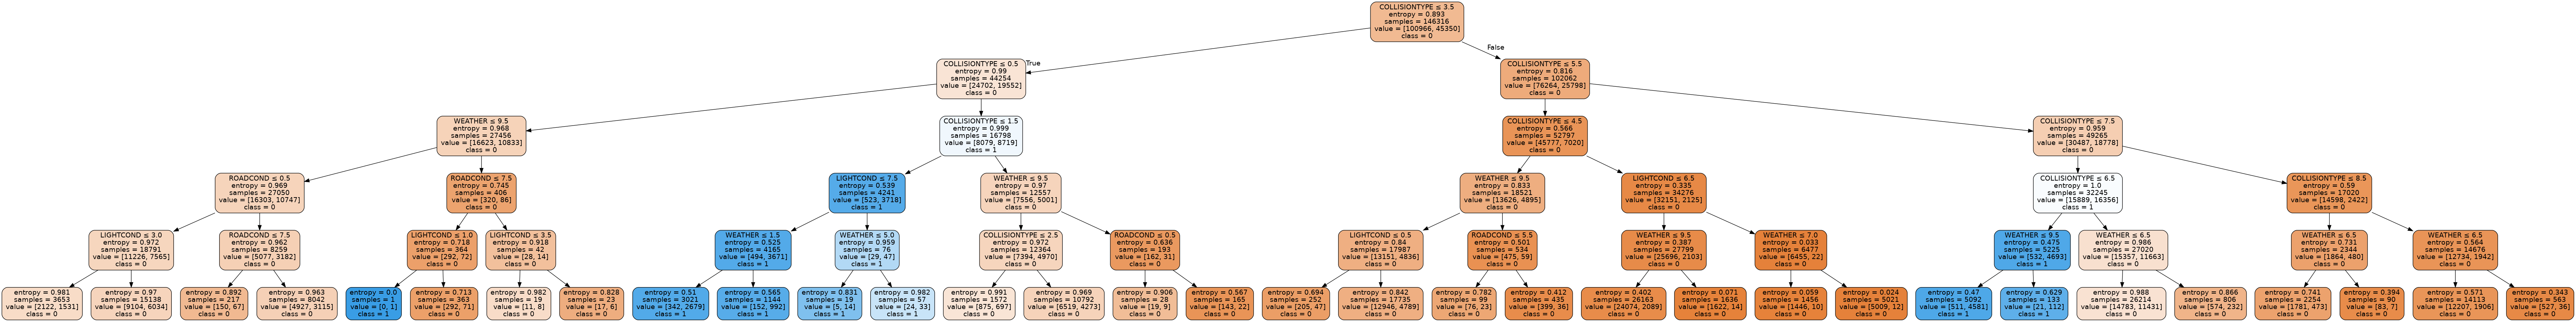

In [38]:
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data, filled=True, special_characters=True, rounded=True, 
        feature_names = ['ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'WEATHER'], class_names = ['0', '1'])  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('accident.png')
Image(graph.create_png())

The decision tree model performs well out-of-sample, with an accuracy score of 74.13%. Above you will find a visualization of the decision tree on the training data. The pruining method and max_depth parameter can be adjusted to optimize the model.